# Exercise - Black's Formula for Options on Futures

#### Notation Commands

$$\newcommand{\Black}{\mathcal{B}}
\newcommand{\Blackcall}{\Black_{\mathrm{call}}}
\newcommand{\Blackput}{\Black_{\mathrm{put}}}
\newcommand{\EcondS}{\hat{S}_{\mathrm{conditional}}}
\newcommand{\Efwd}{\mathbb{E}^{T}}
\newcommand{\Ern}{\mathbb{E}^{\mathbb{Q}}}
\newcommand{\Tfwd}{T_{\mathrm{fwd}}}
\newcommand{\Tunder}{T_{\mathrm{bond}}}
\newcommand{\accint}{A}
\newcommand{\carry}{\widetilde{\cpn}}
\newcommand{\cashflow}{C}
\newcommand{\convert}{\phi}
\newcommand{\cpn}{c}
\newcommand{\ctd}{\mathrm{CTD}}
\newcommand{\disc}{Z}
\newcommand{\done}{d_{1}}
\newcommand{\dt}{\Delta t}
\newcommand{\dtwo}{d_{2}}
\newcommand{\flatvol}{\sigma_{\mathrm{flat}}}
\newcommand{\flatvolT}{\sigma_{\mathrm{flat},T}}
\newcommand{\float}{\mathrm{flt}}
\newcommand{\freq}{m}
\newcommand{\futprice}{\mathcal{F}(t,T)}
\newcommand{\futpriceDT}{\mathcal{F}(t+h,T)}
\newcommand{\futpriceT}{\mathcal{F}(T,T)}
\newcommand{\futrate}{\mathscr{f}}
\newcommand{\fwdprice}{F(t,T)}
\newcommand{\fwdpriceDT}{F(t+h,T)}
\newcommand{\fwdpriceT}{F(T,T)}
\newcommand{\fwdrate}{f}
\newcommand{\fwdvol}{\sigma_{\mathrm{fwd}}}
\newcommand{\fwdvolTi}{\sigma_{\mathrm{fwd},T_i}}
\newcommand{\grossbasis}{B}
\newcommand{\hedge}{\Delta}
\newcommand{\ivol}{\sigma_{\mathrm{imp}}}
\newcommand{\logprice}{p}
\newcommand{\logyield}{y}
\newcommand{\mat}{(n)}
\newcommand{\nargcond}{d_{1}}
\newcommand{\nargexer}{d_{2}}
\newcommand{\netbasis}{\tilde{\grossbasis}}
\newcommand{\normcdf}{\mathcal{N}}
\newcommand{\notional}{K}
\newcommand{\pfwd}{P_{\mathrm{fwd}}}
\newcommand{\pnl}{\Pi}
\newcommand{\price}{P}
\newcommand{\probexer}{\hat{\mathcal{P}}_{\mathrm{exercise}}}
\newcommand{\pvstrike}{K^*}
\newcommand{\refrate}{r^{\mathrm{ref}}}
\newcommand{\rrepo}{r^{\mathrm{repo}}}
\newcommand{\spotrate}{r}
\newcommand{\spread}{s}
\newcommand{\strike}{K}
\newcommand{\swap}{\mathrm{sw}}
\newcommand{\swaprate}{\cpn_{\swap}}
\newcommand{\tbond}{\mathrm{fix}}
\newcommand{\ttm}{\tau}
\newcommand{\value}{V}
\newcommand{\vega}{\nu}
\newcommand{\years}{\tau}
\newcommand{\yearsACT}{\tau_{\mathrm{act/360}}}
\newcommand{\yield}{Y}$$

### Data

In this exercise, we use Black's formula to price options on futures contracts.
* `option_data_bb_SFRZ5.xlsx` - market data on SOFR 3-month futures, and its option chain.

# 1. SOFR Futures Options

In [1]:
import pandas as pd

In [3]:
import pandas as pd

FILEDATA = "./data/option_data_bb_SFRZ5.xlsx"
SHEETNAME = 'spot'
spot = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).rename(columns={'Unnamed: 0': 'field'}).set_index('field')
display(spot)

,SFRZ5 Comdty
field,
name,3 MONTH SOFR FUT Dec25
last update date,2025-07-29 00:00:00
last update time,10:03:48
price,96.085
hist vol 30d,0.006851
hist vol 60d,0.007595
volume,150071


In [14]:
EXPRY_CHAIN_LOC = 1
SHEETNAME = pd.ExcelFile(FILEDATA).sheet_names[EXPRY_CHAIN_LOC]
options = pd.read_excel(FILEDATA, sheet_name=SHEETNAME).set_index('ticker')
display(options.loc[options['option type'].str.contains('C')])
display(options.loc[options['option type'].str.contains('P')])

,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5C 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.7500,0.3300,0.04396,-0.0050,...,0.899011,0.028984,0.002962,-0.000265,0.3350,0.350,51,51,10703,NaN
SFRV5C 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8125,0.2775,0.04396,0.0050,...,0.847946,0.037543,0.003990,-0.000369,0.2850,0.295,120,333,0,NaN
SFRV5C 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.8750,0.2325,0.04396,0.0225,...,0.768768,0.045176,0.005212,-0.000524,0.2350,0.245,14976,119,20020,NaN
SFRV5C 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,95.9375,0.1950,0.04396,0.0475,...,0.679044,0.049114,0.006161,-0.000676,0.1950,0.205,15838,248,7013,NaN
SFRV5C 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0000,0.1600,0.04396,0.0750,...,0.589523,0.049138,0.006712,-0.000805,0.1600,0.175,7500,19302,15635,NaN
SFRV5C 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.0625,0.1300,0.04396,0.1075,...,0.506743,0.047811,0.006902,-0.000892,0.1350,0.145,100,36274,31106,3882.0
SFRV5C 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.1250,0.1050,0.04396,0.1050,...,0.430860,0.046676,0.006811,-0.000887,0.1050,0.115,37066,8327,43461,2500.0
SFRV5C 96.1875 Comdty,2025-07-29,08:33:45,73,C,AMER,2500,96.1875,0.0850,0.04396,0.0850,...,0.360056,0.043005,0.006494,-0.000875,0.0800,0.095,56885,48479,76938,2698.0
SFRV5C 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,C,AMER,2500,96.2500,0.0675,0.04396,0.0675,...,0.297882,0.038291,0.006022,-0.000844,0.0650,0.075,46199,27485,72563,9950.0


,last update date,last update time,days to expiration,option type,exercise style,option contract size,strike price,price,finance rate,time value,...,delta,gamma,vega,theta,bid,ask,bid size,ask size,open int,volume
ticker,,,,,,,,,,,,,,,,,,,,,
SFRV5P 95.75 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.7500,0.0075,0.04396,0.0075,...,-0.076812,0.025414,0.002511,-0.000220,0.0050,0.010,25297,11208,57342,2550.0
SFRV5P 95.8125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8125,0.0175,0.04396,0.0175,...,-0.138375,0.036404,0.003844,-0.000361,0.0125,0.020,50328,39390,18597,NaN
SFRV5P 95.875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.8750,0.0350,0.04396,0.0350,...,-0.219462,0.045113,0.005143,-0.000522,0.0275,0.035,40887,8311,50736,5225.0
SFRV5P 95.9375 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,95.9375,0.0575,0.04396,0.0575,...,-0.313520,0.049041,0.006158,-0.000689,0.0500,0.060,33397,49762,18828,NaN
SFRV5P 96 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0000,0.0850,0.04396,0.0850,...,-0.398240,0.051125,0.006694,-0.000782,0.0750,0.085,53974,758,62162,1000.0
SFRV5P 96.0625 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.0625,0.1175,0.04396,0.1175,...,-0.483743,0.048766,0.006901,-0.000871,0.1100,0.120,1197,40350,11505,3286.0
SFRV5P 96.125 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1250,0.1550,0.04396,0.1150,...,-0.560378,0.046505,0.006812,-0.000895,0.1450,0.155,867,34387,63551,NaN
SFRV5P 96.1875 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.1875,0.1950,0.04396,0.0925,...,-0.634074,0.043781,0.006484,-0.000842,0.1850,0.195,353,22485,14955,NaN
SFRV5P 96.25 Comdty,2025-07-28,2025-07-28 00:00:00,73,P,AMER,2500,96.2500,0.2425,0.04396,0.0775,...,-0.698355,0.038957,0.005992,-0.000807,0.2300,0.240,238,17500,13145,NaN


### 1.1.

Use Black's Formula to price the **call option**
* at the nearest expiration
* using the ATM strike (strike nearest the spot)
* using the implied vol provided in the data
* using the finance rate as the discount rate

How close is your estimate to the market quote?

In [39]:
import numpy as np
from scipy.stats import norm

def bs_call_put(
        strike: float, 
        spot: float, 
        ttm: float, 
        rate: float, 
        ivol: float) -> pd.DataFrame:

    d_1 = (np.log(spot/strike) + ttm * (rate + (np.pow(ivol,2)/2))) / (ivol * np.sqrt(ttm))
    d_2 = d_1 - (ivol * np.sqrt(ttm))

    call = spot * norm.cdf(d_1) - strike * np.exp(-rate*ttm) * norm.cdf(d_2)
    put  = strike * np.exp(-rate*ttm) * norm.cdf(-d_2) - spot * norm.cdf(-d_1)

    return pd.DataFrame({"call":[call], "put":[put]})

def black76_call_put(
        F: float,
        strike: float,
        ttm: float,
        sigma: float,
        DF: float) -> pd.DataFrame:
    d1 = (np.log(F/strike) + 0.5*sigma**2*ttm) / (sigma*np.sqrt(ttm))
    d2 = d1 - sigma*np.sqrt(ttm)

    call = DF*(F*norm.cdf(d1) - strike*norm.cdf(d2))
    put  = DF*(strike*norm.cdf(-d2) - F*norm.cdf(-d1))

    return pd.DataFrame({"call":[call], "put":[put]})


In [53]:
spot_price = spot.loc['price', 'SFRZ5 Comdty']


options_nearest = options.loc[options['days to expiration'] == options['days to expiration'].min()]
atm_option = options_nearest.iloc[np.abs(options_nearest['strike price'] - spot_price).argmin()]

Kp = float(atm_option['strike price'])
sigma = float(atm_option['implied vol'])
T = float(atm_option["days to expiration"]) / 365.0

r = float(atm_option['finance rate'])
DF = np.exp(-r*T)

F_rate = 100.0 - spot_price
K_rate = 100.0 - Kp

price_estimation = black76_call_put(F_rate, K_rate, T, sigma, DF)

call_estimation = float(price_estimation['put'].iloc[0])
call_estimation

call_market = atm_option["price"]

print(f"My estimation for the market quote is {call_estimation:0.4f} and the actual market quote is {call_market:0.4f}.\nThe difference is {call_estimation-call_market:0.4f}.")

My estimation for the market quote is 0.1402 and the actual market quote is 0.1300.
The difference is 0.0102.


### 1.2.

Value the entire strike chain for the nearest expiration.
* Use the provided implied vol for each strike.

Plot the Black values against the market values.

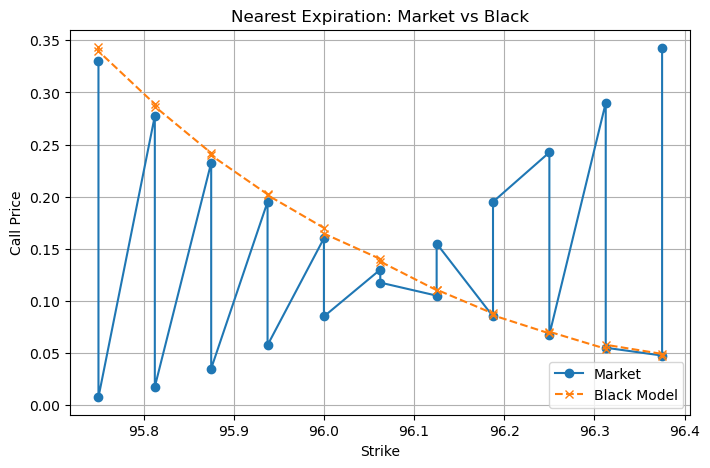

In [63]:
import matplotlib.pyplot as plt

spot_price = spot.loc['price', 'SFRZ5 Comdty']

options_nearest = options.loc[
    options['days to expiration'] == options['days to expiration'].min()
].copy()

options_nearest = options_nearest.sort_values('strike price')

F_rate = 100.0 - spot_price

strikes = []
black_vals = []
mkt_vals = []

for _, opt in options_nearest.iterrows():
    Kp = float(opt['strike price'])
    sigma = float(opt['implied vol'])
    T = float(opt["days to expiration"]) / 365.0

    r = float(opt['finance rate'])
    DF = np.exp(-r*T)

    K_rate = 100.0 - Kp

    px = black76_call_put(F_rate, K_rate, T, sigma, DF)

    call_black = float(px['put'].iloc[0])
    call_mkt = float(opt['price'])

    strikes.append(Kp)
    black_vals.append(call_black)
    mkt_vals.append(call_mkt)

plt.figure(figsize=(8,5))
plt.plot(strikes, mkt_vals, 'o-', label='Market')
plt.plot(strikes, black_vals, 'x--', label='Black Model')
plt.xlabel("Strike")
plt.ylabel("Call Price")
plt.title("Nearest Expiration: Market vs Black")
plt.grid(True)
plt.legend()
plt.show()

### 1.3. 

What are a few reasons that Black's value doesn't match the market value?

How significant is the American nature of the exercise?

### 1.4.

How is implied vol being quoted? As in, does it reflect units of vol of percent changes in the SOFR rate? Or day-over-day differences? Or something else?

Use the data in `ref_rates.xlsx` to calculate the historic 60-day rolling volatility of the SOFR rate.

### 1.5.

Plot the open interest across strikes. 

Report the total notional open interest across the chain for this expiration.